In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('process_heart.csv')

In [3]:
df.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  number_major_vessels  target  sex_female  sex_male  \
0            2.3                     0       1           0         1   
1            3.5                     0       1           0         1   
2            1.4                     0       1           1         0   
3            0.8                     0       1           0         1   
4            0.6                     0       1           1         0   

   chest_pain_type_asymptomatic  ...  rest_ecg_normal  \
0                             1  ...                1   
1                             0  ...                0   
2                             0  ...                1   
3                             0  ...                0   
4                             0  ...                0   

   exercise_induced_angina_no  exercise_induced_angina_yes  \
0                           1                            0   
1                           1                            0   
2                           1                            0   
3                           1                            0   
4                           0                            1   

   st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
0                     0              0                   1   
1                     0              0                   1   
2                     1              0                   0   
3                     1              0                   0   
4                     1              0                   0   

   thalassemia_fixed defect  thalassemia_normal  \
0                         0                   1   
1                         1                   0   
2                         1                   0   
3                         1                   0   
4                         1                   0   

   thalassemia_reversable defect  thalassemia_unknown  
0                              0                    0  
1                              0                    0  
2                              0                    0  
3                              0                    0  
4                              0                    0  

[5 rows x 27 columns]

In [4]:
X = df.drop('target', axis=1)

In [5]:
X.shape

(303, 26)

In [6]:
y = df['target']

In [7]:
y.shape

(303,)

In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [10]:
X_train.shape

(242, 26)

In [11]:
X_test.shape

(61, 26)

In [12]:
y_train.shape

(242,)

In [13]:
y_test.shape

(61,)

In [14]:
X_train.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
286   59                     134          204                      162   
102   63                     140          195                      179   
242   64                     145          212                      132   
65    35                     138          183                      182   
35    46                     142          177                      160   

     st_depression  number_major_vessels  sex_female  sex_male  \
286            0.8                     2           0         1   
102            0.0                     2           1         0   
242            2.0                     2           0         1   
65             1.4                     0           1         0   
35             1.4                     0           1         0   

     chest_pain_type_asymptomatic  chest_pain_type_atypical angina  ...  \
286                             1                                0  ...   
102                             0                                1  ...   
242                             0                                0  ...   
65                              0                                0  ...   
35                              0                                0  ...   

     rest_ecg_normal  exercise_induced_angina_no  exercise_induced_angina_yes  \
286                0                           1                            0   
102                0                           1                            0   
242                1                           1                            0   
65                 0                           1                            0   
35                 1                           0                            1   

     st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
286                     1              0                   0   
102                     1              0                   0   
242                     0              1                   0   
65                      1              0                   0   
35                      0              0                   1   

     thalassemia_fixed defect  thalassemia_normal  \
286                         1                   0   
102                         1                   0   
242                         0                   1   
65                          1                   0   
35                          1                   0   

     thalassemia_reversable defect  thalassemia_unknown  
286                              0                    0  
102                              0                    0  
242                              0                    0  
65                               0                    0  
35                               0                    0  

[5 rows x 26 columns]

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [17]:
estimator = model.estimators_[7]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2059200585, splitter='best')

In [18]:
feature_names = X_train.columns
y_train_str = y_train.astype('str')
y_train_str[y_train_str=='0'] = 'no disease'
y_train_str[y_train_str=='1'] = 'disease'

In [19]:
y_train_str

286    no disease
102       disease
242    no disease
65        disease
35        disease
          ...    
156       disease
123       disease
15        disease
125       disease
265    no disease
Name: target, Length: 242, dtype: object

In [20]:
y_train_str = y_train_str.values

In [21]:
y_train_str

array(['no disease', 'disease', 'no disease', 'disease', 'disease',
       'disease', 'no disease', 'no disease', 'no disease', 'disease',
       'disease', 'disease', 'disease', 'no disease', 'disease',
       'no disease', 'no disease', 'no disease', 'disease', 'no disease',
       'disease', 'no disease', 'no disease', 'disease', 'no disease',
       'disease', 'disease', 'no disease', 'disease', 'no disease',
       'disease', 'no disease', 'no disease', 'disease', 'disease',
       'disease', 'no disease', 'no disease', 'disease', 'disease',
       'disease', 'no disease', 'disease', 'disease', 'no disease',
       'disease', 'no disease', 'disease', 'no disease', 'disease',
       'no disease', 'disease', 'no disease', 'disease', 'disease',
       'disease', 'disease', 'no disease', 'disease', 'no disease',
       'no disease', 'disease', 'disease', 'disease', 'disease',
       'no disease', 'no disease', 'disease', 'disease', 'no disease',
       'no disease', 'no disease', 'no 

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', feature_names=feature_names, class_names=y_train_str,
               rounded=True, proportion=True, label='root', precision=2, filled=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename='tree.png')

In [30]:
import eli5
eli5.show_weights(estimator, feature_names=feature_names.to_list())

Using TensorFlow backend.


In [31]:
model.feature_importances_

array([0.05614043, 0.04827184, 0.04407129, 0.08853471, 0.08467226,
       0.14020655, 0.02749492, 0.02202319, 0.0098385 , 0.00767497,
       0.02349542, 0.1477068 , 0.00561248, 0.00691582, 0.00972928,
       0.00072171, 0.01042145, 0.03575505, 0.04107245, 0.03384032,
       0.02449912, 0.00315107, 0.06898662, 0.00388003, 0.05441833,
       0.00086539])

In [32]:
test_sample = X_test.iloc[2]

In [33]:
test_sample.shape

(26,)

In [35]:
test_sample = np.array(test_sample).reshape(1, -1)

In [36]:
test_sample.shape

(1, 26)

In [37]:
model.predict(test_sample)

array([0], dtype=int64)

In [38]:
model.predict_proba(test_sample)

array([[0.6365729, 0.3634271]])

In [42]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix_model = confusion_matrix(y_test, y_pred)
confusion_matrix_model

array([[26,  9],
       [ 4, 22]], dtype=int64)

In [45]:
import itertools
def cnf_matrix_plotter(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    threshold = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                fontsize=25)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()   

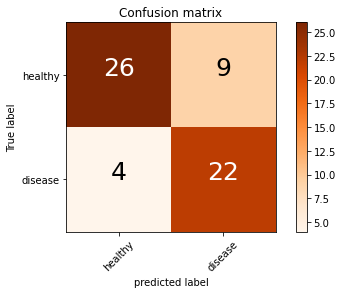

In [46]:
cnf_matrix_plotter(confusion_matrix_model, ['healthy', 'disease'])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['healthy', 'disease']))

              precision    recall  f1-score   support

     healthy       0.87      0.74      0.80        35
     disease       0.71      0.85      0.77        26

   micro avg       0.79      0.79      0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [50]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_quant

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

In [51]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.14285714, 0.14285714, 0.31428571, 0.31428571, 0.4       ,
       0.4       , 0.42857143, 0.42857143, 0.74285714, 0.74285714,
       1.        ])

In [52]:
tpr

array([0.        , 0.03846154, 0.57692308, 0.57692308, 0.80769231,
       0.80769231, 0.84615385, 0.84615385, 0.88461538, 0.88461538,
       0.92307692, 0.92307692, 0.96153846, 0.96153846, 1.        ,
       1.        ])

In [53]:
thresholds

array([1.93645047, 0.93645047, 0.81065092, 0.79837412, 0.71306832,
       0.59156271, 0.58406748, 0.3634271 , 0.36295728, 0.32106939,
       0.30121222, 0.24948053, 0.24640417, 0.09956847, 0.0811667 ,
       0.00499249])

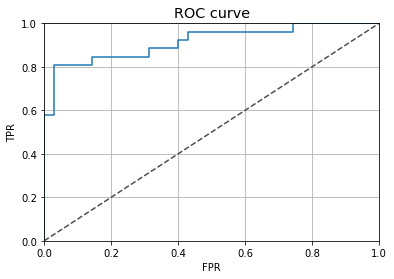

In [54]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls='--', c='.3')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)

In [55]:
auc(fpr, tpr)

0.9153846153846154

In [56]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

In [22]:
import shap
shap.initjs()

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [24]:
len(shap_values)

2

In [25]:
shap_values[0].shape # 不患病

(61, 26)

In [26]:
shap_values[1].shape # 患病

(61, 26)

In [27]:
explainer.expected_value # 不患病和患病的平均概率

array([0.42483471, 0.57516529])

# 某样本患病的概率等于其各特征对患病的shap值之和+患病的平均概率

In [28]:
shap_values[1].sum(axis=1).shape

(61,)

In [29]:
y_pred_proba_shap = shap_values[1].sum(axis=1) + explainer.expected_value[1]
y_pred_proba_shap

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

In [30]:
y_pred = model.predict_proba(X_test)
y_pred[:, 1] #和上面一样

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

In [32]:
y_pred_proba = y_pred_proba_shap

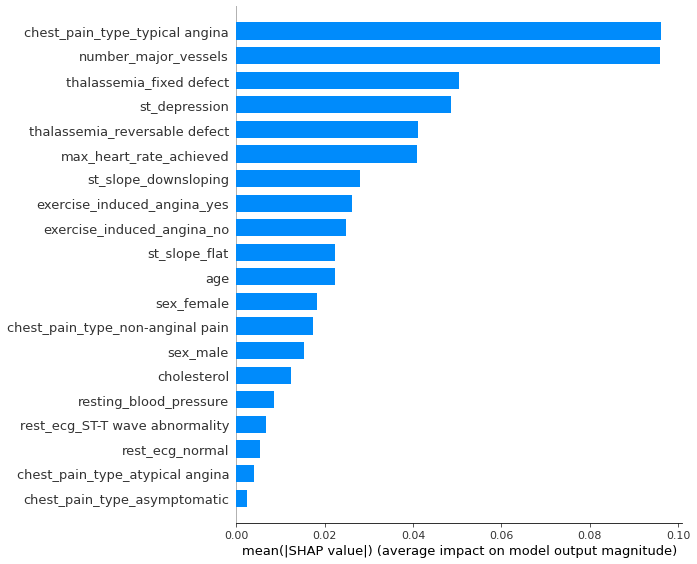

In [33]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

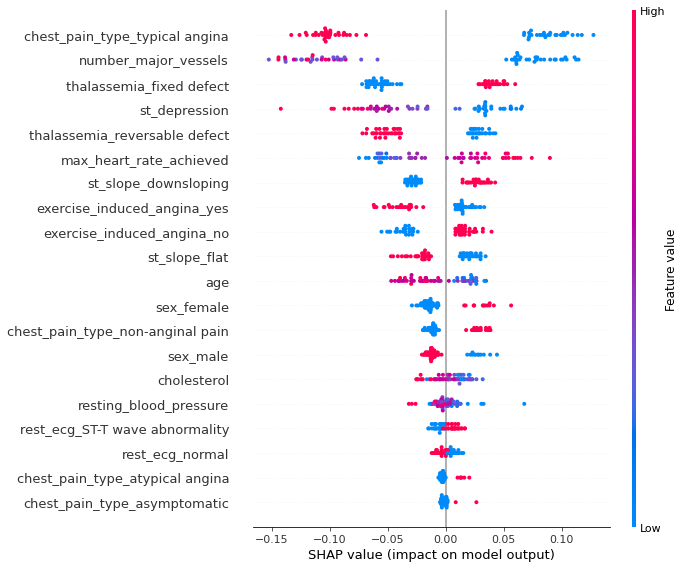

In [34]:
shap.summary_plot(shap_values[1], X_test)

In [35]:
idx = 126
patient = X.iloc[idx, :]
patient_df = X.loc[idx:idx]
model_predict_proba = model.predict_proba(patient_df)[0][1]
print(f'{idx}号病人真实标签{bool(y_test[idx])},模型预测为{model_predict_proba}')
shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

126号病人真实标签True,模型预测为0.770778302399632


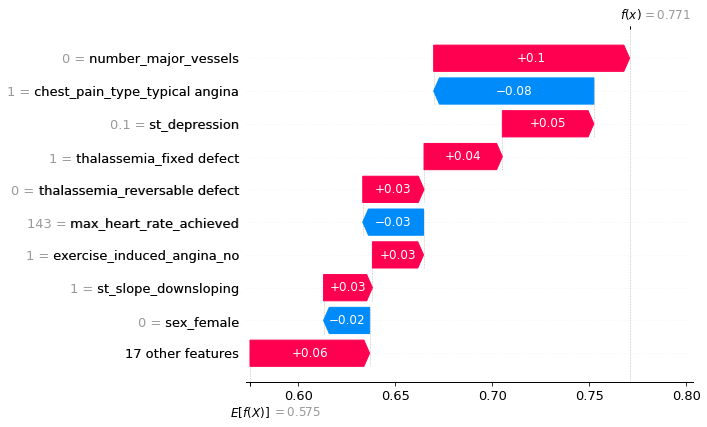

In [36]:
shap.waterfall_plot(explainer.expected_value[1], shap_values_patient[1], patient)

In [38]:
number_show = 60
shap_values_summary = explainer.shap_values(X_train.iloc[:number_show])
shap.force_plot(explainer.expected_value[1], shap_values_summary[1], X_test.iloc[:number_show])

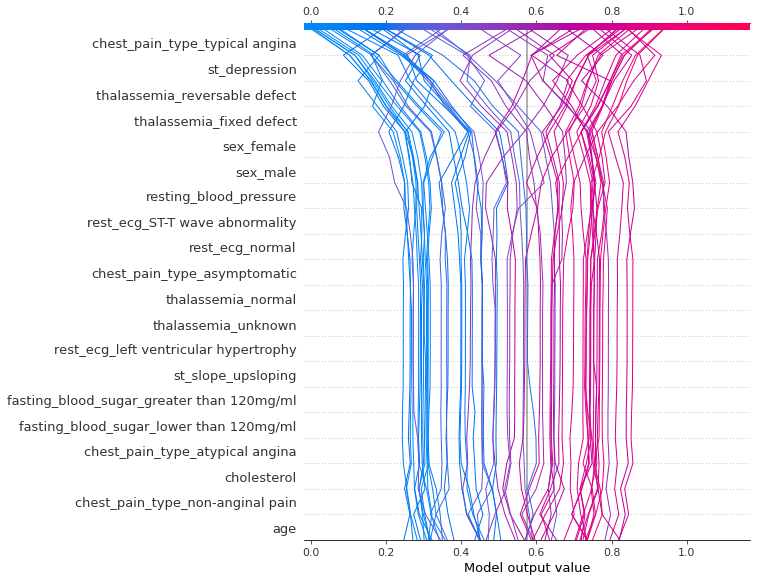

In [40]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test, feature_order='hclust')

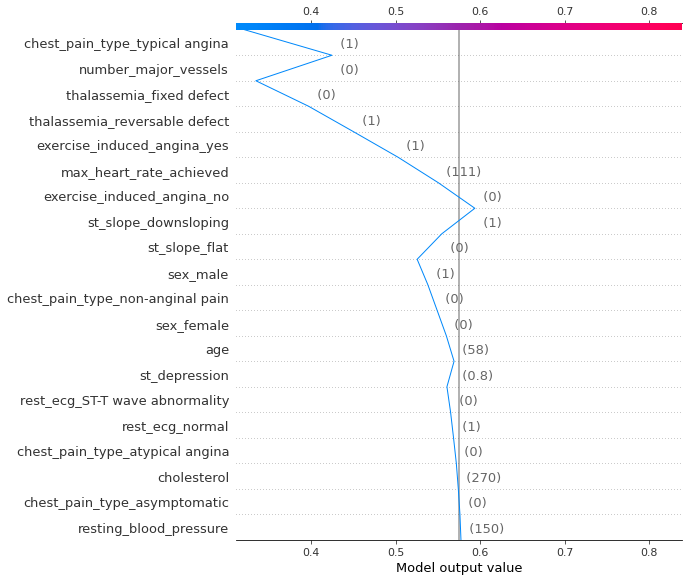

In [42]:
idx = 24
selection = np.zeros((61))
selection[idx] = 1
selection = selection > 0
shap.decision_plot(explainer.expected_value[1], shap_values[1][selection], X_test[selection])